In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# choosing Tsarget5 as my roll number is 102203489
data = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4'])

X = data.drop(columns=['Target5'])
y = data['Target5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })
    
    print(f"Metrics for {name}: MSE={mse}, RMSE={rmse}, R2={r2}")



Metrics for Linear Regression: MSE=622.3638513116089, RMSE=24.947221314439187, R2=0.6943488059944714
Metrics for Decision Tree: MSE=818.8607543333334, RMSE=28.61574312041072, R2=0.5978465542965209
Metrics for Random Forest: MSE=455.7343877474334, RMSE=21.34793638147335, R2=0.7761827595371728


In [16]:
results_df = pd.DataFrame(results)

print("Detailed Results Analysis:")
print(results_df)

results_df.to_csv("model_results.csv", index=False)


Detailed Results Analysis:
               Model         MSE       RMSE        R2
0  Linear Regression  622.363851  24.947221  0.694349
1      Decision Tree  818.860754  28.615743  0.597847
2      Random Forest  455.734388  21.347936  0.776183


### VISUALIZING THE DATA

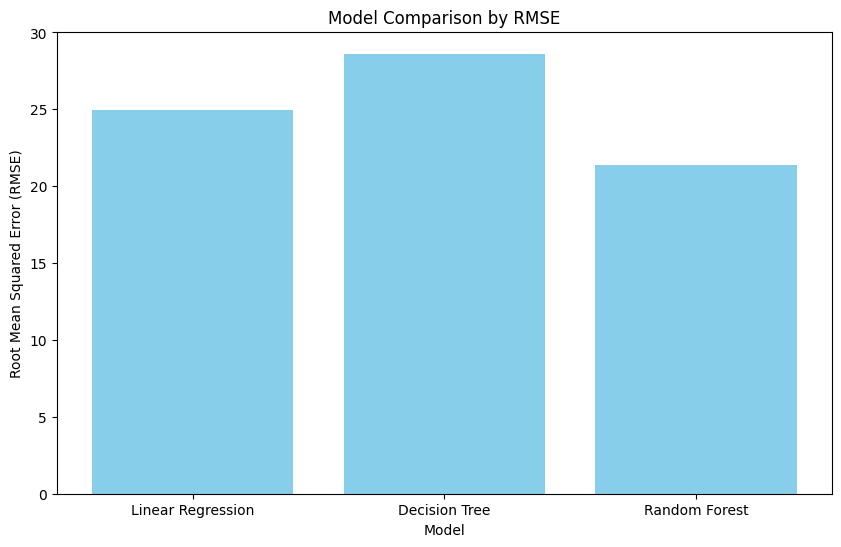

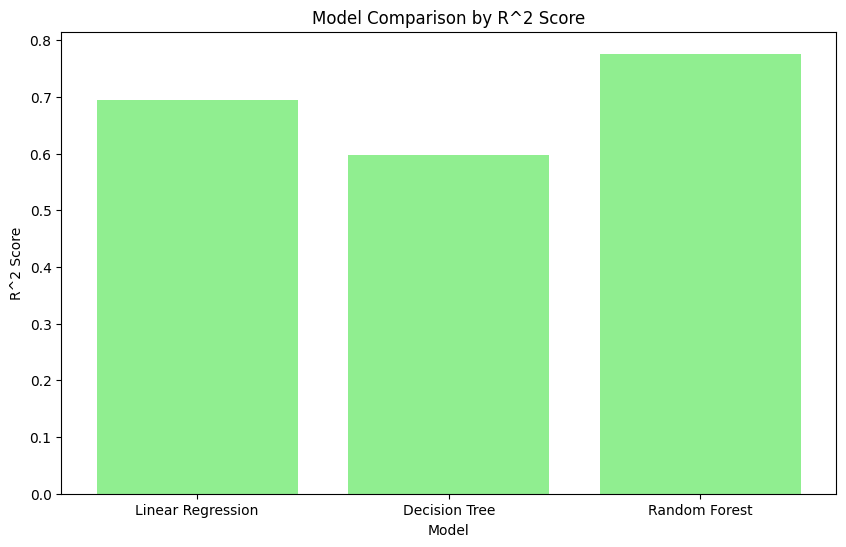

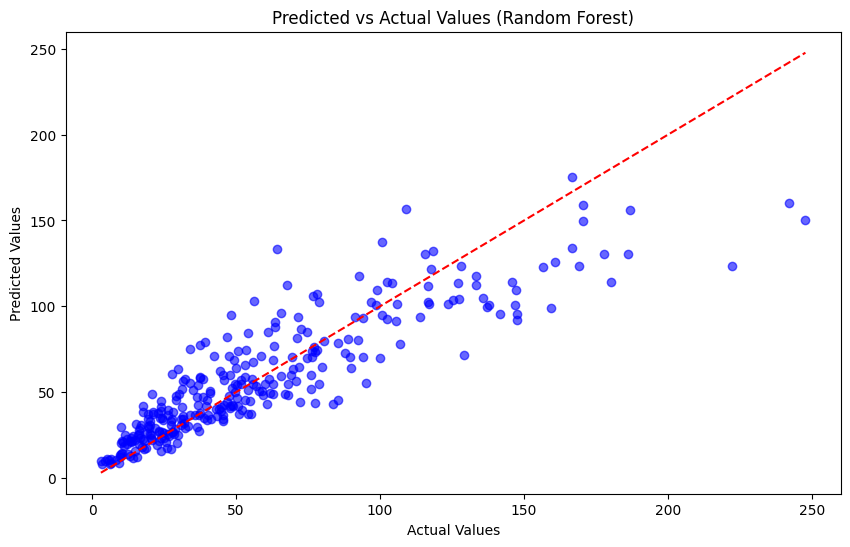

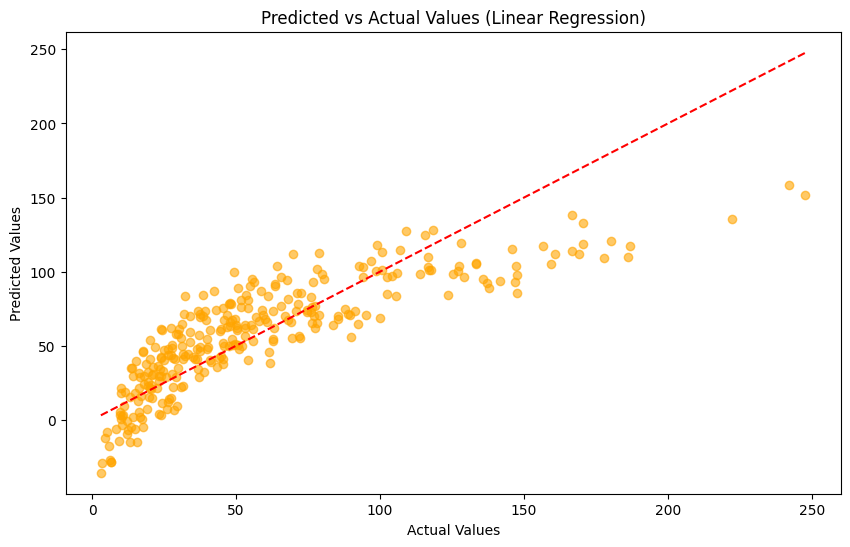

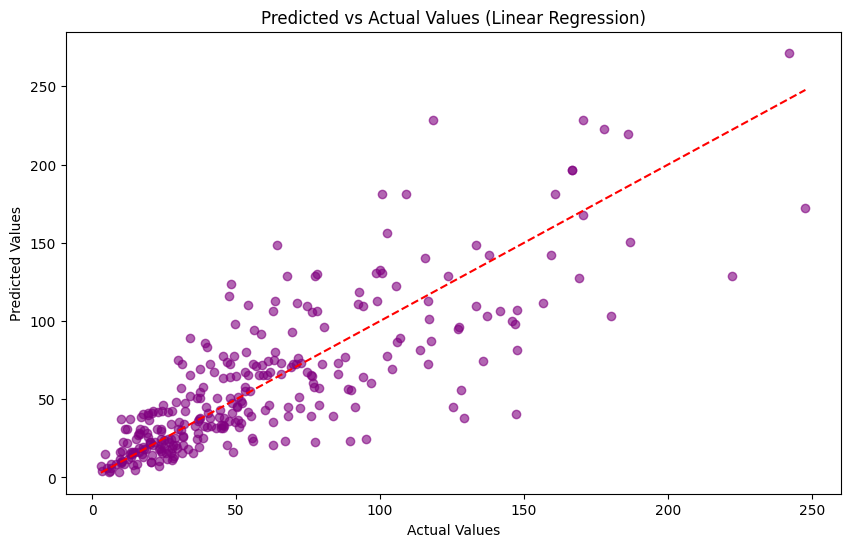

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison by RMSE')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Model Comparison by R^2 Score')
plt.show()


rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Random Forest)')
plt.show()



lr_model = models["Linear Regression"]
y_pred_lr = lr_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Linear Regression)')
plt.show()



dt_model = models["Decision Tree"]
y_pred_dt = dt_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Linear Regression)')
plt.show()


### FINDING THE BEST MODEL

In [24]:
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]['Model']
best_r2_model = results_df.loc[results_df['R2'].idxmax()]['Model']

In [25]:
if best_rmse_model == best_r2_model:
    print(f"\nThe best model based on both RMSE and R^2 is: {best_rmse_model}")
else:
    print(f"\nThe best model based on RMSE is: {best_rmse_model}")
    print(f"The best model based on R^2 is: {best_r2_model}")


The best model based on both RMSE and R^2 is: Random Forest
